### Problem Statement:

Perform Exploratory Data Analysis (EDA) in order to generate insights that could help Netflix in deciding which type of
shows or movies to produce and how they can grow the business in different countries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
!python -m wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

In [2]:
df = pd.read_csv("netflix.csv")
df_original = df.copy()

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.shape

(8807, 12)

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Get percentage of missing values in columns of `df`

In [10]:

print(f"Column Name  : Missing Value in %")
print("-"*35)
for col in df.columns.tolist():
    if df[col].isna().sum() > 0:
        print(f"{col:<12} : {(round((((df[col].isna().sum()) / df.shape[0]) * 100), 2)):0>5} %")
print("-"*35)

Column Name  : Missing Value in %
-----------------------------------
director     : 29.91 %
cast         : 09.37 %
country      : 09.44 %
date_added   : 00.11 %
rating       : 00.05 %
duration     : 00.03 %
-----------------------------------


In [11]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

### Drop the column `description` from dataframe `df` as we can not generate insights using this column in this case study.

In [12]:
df.drop(columns=["description"], inplace = True)

In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [14]:
df.shape

(8807, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### Challanges in data pre-processing:

    1. Normalise the dataframe to make data un-nested:
        - Use `split` and `stack` for columns `director`, `cast`, `country`, `listed_in`.
        - After then join the seperate dataframes together and then merge that final dataframe with original dataframe on column `title` to get whole data.
        - Remove duplicate columns from original dataframe `df`.
    2. Update the datatypes of columns in `df` with correct types:
        - Update column `date_added` to `datetime` datatype.
    3. Dealing with `NaN` values:
        - Use `mode` imputation for categorical values.
        - Use `median` imputation for numerical values.
    4. Drop the rows which has mismatched values:
        -  e.g. `rating` column values
    5. Drop the duplicate rows.



### 1. Normalise the dataframe to make data un-nested:
    - Use `split` and `stack` for columns `director`, `cast`, `country`, `listed_in`.
    - After then join the seperate dataframes together and then merge that final dataframe with original dataframe on column `title` to get whole data.
    - Remove duplicate columns from original dataframe `df`.


#### Use `split` and `stack` for column `director` and create `df_director`

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [18]:
list_director = df["director"].apply(lambda x: str(x).split(", ")).tolist()

In [19]:
df_director = pd.DataFrame(list_director, index = df["title"])

In [20]:
df_director = df_director.stack()

In [21]:
df_director = pd.DataFrame(df_director)

In [22]:
df_director.reset_index(inplace= True)

In [23]:
df_director = df_director[["title", 0]]

In [24]:
df_director.rename(columns = {0: "director"}, inplace = True)

In [25]:
df_director.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


#### Use `split` and `stack` for column `cast` and create `df_cast`

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [27]:
list_cast = df["cast"].apply(lambda x: str(x).split(", ")).tolist()

In [28]:
df_cast = pd.DataFrame(list_cast, index=df["title"])

In [29]:
df_cast = df_cast.stack()

In [30]:
df_cast=pd.DataFrame(df_cast)

In [31]:
df_cast.reset_index(inplace=True)

In [32]:
df_cast = df_cast[["title", 0]]

In [33]:
df_cast.rename(columns = {0:'cast'}, inplace = True)

In [34]:
df_cast.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


#### Use `split` and `stack` for column `country` and create `df_country`

In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [36]:
list_country = df["country"].apply(lambda x: str(x).split(", ")).tolist()

In [37]:
df_country = pd.DataFrame(list_country, index = df["title"])

In [38]:
df_country = df_country.stack()

In [39]:
df_country = pd.DataFrame(df_country)

In [40]:
df_country.reset_index(inplace = True)

In [41]:
df_country = df_country[["title", 0]]

In [42]:
df_country.rename(columns = {0: "country"}, inplace = True)

In [43]:
df_country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


#### Use `split` and `stack` for column `list_listed` and create `df_listed_in`

In [47]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [48]:
list_listed_in = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()

In [49]:
df_listed_in = pd.DataFrame(list_listed_in, index=df["title"])

In [50]:
df_listed_in = df_listed_in.stack()

In [51]:
df_listed_in = pd.DataFrame(df_listed_in)

In [52]:
df_listed_in.reset_index(inplace= True)

In [53]:
df_listed_in = df_listed_in[["title", 0]]

In [54]:
df_listed_in.rename(columns = {0: "listed_in"}, inplace= True)

In [55]:
df_listed_in.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


#### Merge the normalised dataframe `df_director` with normalised dataframe `df_cast` on column `title` to get whole data.

In [56]:
first_merge_df = pd.merge(df_director, df_cast, how='inner', on="title")
first_merge_df.head()

,title,director,cast
0,Dick Johnson Is Dead,Kirsten Johnson,nan
1,Blood & Water,nan,Ama Qamata
2,Blood & Water,nan,Khosi Ngema
3,Blood & Water,nan,Gail Mabalane
4,Blood & Water,nan,Thabang Molaba


#### Merge the dataframe `first_merge_df` with normalised dataframe `df_country` on column `title` to get whole data.

In [57]:
second_merge_df = pd.merge(first_merge_df, df_country, how='inner', on="title")
second_merge_df.head()

,title,director,cast,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States
1,Blood & Water,nan,Ama Qamata,South Africa
2,Blood & Water,nan,Khosi Ngema,South Africa
3,Blood & Water,nan,Gail Mabalane,South Africa
4,Blood & Water,nan,Thabang Molaba,South Africa


#### Merge the dataframe `second_merge_df` with normalised dataframe `df_listed_in` on column `title` to get whole data.

In [58]:
third_merge_df = pd.merge(second_merge_df, df_listed_in, how='inner', on="title")
third_merge_df.head()

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows


#### Merge the dataframe `third_merge_df` with orginal dataframe `df` on column `title` to get whole data.

In [59]:
final_merge_df = pd.merge(df, third_merge_df, how='inner', on="title")
final_merge_df.drop(columns=["director_x", "cast_x", "country_x", "listed_in_x"], inplace = True)
final_merge_df.rename(columns = {"director_y" : "director", "cast_y" : "cast", "country_y" : "country", "listed_in_y" : "listed_in"}, inplace = True)
final_merge_df.head(50)

,show_id,type,title,date_added,release_year,rating,duration,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Kirsten Johnson,nan,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows
5,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Khosi Ngema,South Africa,TV Dramas
6,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Khosi Ngema,South Africa,TV Mysteries
7,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Gail Mabalane,South Africa,International TV Shows
8,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Gail Mabalane,South Africa,TV Dramas
9,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,nan,Gail Mabalane,South Africa,TV Mysteries


In [60]:
final_merge_df.replace(to_replace=["nan"], value=[np.nan], inplace=True)

In [61]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [62]:
df_clean = final_merge_df[df.columns.tolist()]
df_clean.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
5,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
6,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
7,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
8,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
9,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries


In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      151348 non-null  object
 4   cast          199845 non-null  object
 5   country       190094 non-null  object
 6   date_added    201833 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201924 non-null  object
 9   duration      201988 non-null  object
 10  listed_in     201991 non-null  object
dtypes: int64(1), object(10)
memory usage: 18.5+ MB


In [64]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows


In [65]:
df_clean.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies
201990,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals


In [66]:
df_clean.shape

(201991, 11)

### 2. Update the datatypes of columns in df with correct types:
    - Update column `date_added` to `datetime` datatype.
    - Add new column `year_added` to `df_clean` dataframe

#### Update datatype of `release_year` to appropriate format.

In [67]:
df_clean["date_added"] = pd.to_datetime(df_clean["date_added"])

In [68]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


In [69]:
df_clean["year_added"] = df_clean["date_added"].dt.year

In [70]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021.0
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,2021.0
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,2021.0
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021.0


In [71]:
df_clean.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'year_added']

In [72]:
df_clean = df_clean[['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'year_added', 'release_year', 'rating', 'duration', 'listed_in']]

In [73]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2021.0,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows


In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201991 non-null  object        
 1   type          201991 non-null  object        
 2   title         201991 non-null  object        
 3   director      151348 non-null  object        
 4   cast          199845 non-null  object        
 5   country       190094 non-null  object        
 6   date_added    201833 non-null  datetime64[ns]
 7   year_added    201833 non-null  float64       
 8   release_year  201991 non-null  int64         
 9   rating        201924 non-null  object        
 10  duration      201988 non-null  object        
 11  listed_in     201991 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 20.0+ MB


In [75]:
df_clean["date_added"].value_counts()

2020-01-01    3748
2019-11-01    2258
2021-07-01    2219
2017-10-01    1899
2021-09-01    1756
              ... 
2014-11-14       1
2017-01-24       1
2020-11-18       1
2017-01-23       1
2021-09-25       1
Name: date_added, Length: 1714, dtype: int64

### 3. Dealing with `NaN` values:
    - Use `mode` imputation for categorical values.
    - Use `median` or `mean` imputation for numerical values.

In [76]:
df_clean.isna().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
year_added        158
release_year        0
rating             67
duration            3
listed_in           0
dtype: int64

#### Get percentage of missing values in columns of `df_clean`

In [77]:
print(f"Column Name  : Missing Value in %")
print("-"*35)
for col in df_clean.columns.tolist():
    if df_clean[col].isna().sum() > 0:
        print(f"{col:<12} : {(round((((df_clean[col].isna().sum()) / df_clean.shape[0]) * 100), 2)):0>5} %")
print("-"*35)

Column Name  : Missing Value in %
-----------------------------------
director     : 25.07 %
cast         : 01.06 %
country      : 05.89 %
date_added   : 00.08 %
year_added   : 00.08 %
rating       : 00.03 %
duration     : 000.0 %
-----------------------------------


#### Use `mode` imputation for filling `NaN` values in `director` column.

In [78]:
df_clean["director"].mode().tolist()[0]

'Martin Scorsese'

In [79]:
df_clean["director"].fillna(df_clean["director"].mode().tolist()[0], inplace = True)

In [80]:
df_clean.isna().sum()

show_id             0
type                0
title               0
director            0
cast             2146
country         11897
date_added        158
year_added        158
release_year        0
rating             67
duration            3
listed_in           0
dtype: int64

In [81]:
df_clean.head(50)

,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2021.0,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Mysteries
4,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
5,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas
6,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Mysteries
7,s2,TV Show,Blood & Water,Martin Scorsese,Gail Mabalane,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
8,s2,TV Show,Blood & Water,Martin Scorsese,Gail Mabalane,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas
9,s2,TV Show,Blood & Water,Martin Scorsese,Gail Mabalane,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Mysteries


#### Use `mode` imputation for filling `NaN` values in `country` column.

In [82]:
df_clean["country"].mode().tolist()[0]

'United States'

In [83]:
df_clean["country"].fillna(df_clean["country"].mode().tolist()[0], inplace = True)

In [84]:
df_clean.isna().sum()

show_id            0
type               0
title              0
director           0
cast            2146
country            0
date_added       158
year_added       158
release_year       0
rating            67
duration           3
listed_in          0
dtype: int64

In [85]:
df_clean.head(50)

,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2021.0,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Mysteries
4,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
5,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas
6,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Mysteries
7,s2,TV Show,Blood & Water,Martin Scorsese,Gail Mabalane,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
8,s2,TV Show,Blood & Water,Martin Scorsese,Gail Mabalane,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas
9,s2,TV Show,Blood & Water,Martin Scorsese,Gail Mabalane,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Mysteries



### 4. Drop the rows which has mismatched values:
    -  e.g. `rating` column values

### Get percentage of missing values in the columns of dataframe `df_clean`

In [86]:
print(f"Column Name  : Missing Value in %")
print("-"*35)
for col in df_clean.columns.tolist():
    if df_clean[col].isna().sum() > 0:
        print(f"{col:<12} : {(round((((df_clean[col].isna().sum()) / df_clean.shape[0]) * 100), 2)):0>5} %")
print("-"*35)

Column Name  : Missing Value in %
-----------------------------------
cast         : 01.06 %
date_added   : 00.08 %
year_added   : 00.08 %
rating       : 00.03 %
duration     : 000.0 %
-----------------------------------


### Missing values for in columns `cast`, `date_added`, `rating` and `duration` are less than 3%.
### Drop the rows where column value for `cast`, `date_added`, `rating` and `duration` is `NaN`.

In [87]:
df_clean = df_clean[df_clean["cast"].notna()]
df_clean = df_clean[df_clean["date_added"].notna()]
df_clean = df_clean[df_clean["rating"].notna()]
df_clean = df_clean[df_clean["duration"].notna()]

In [88]:
df_clean.reset_index(inplace= True)

In [89]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199617 entries, 0 to 199616
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         199617 non-null  int64         
 1   show_id       199617 non-null  object        
 2   type          199617 non-null  object        
 3   title         199617 non-null  object        
 4   director      199617 non-null  object        
 5   cast          199617 non-null  object        
 6   country       199617 non-null  object        
 7   date_added    199617 non-null  datetime64[ns]
 8   year_added    199617 non-null  float64       
 9   release_year  199617 non-null  int64         
 10  rating        199617 non-null  object        
 11  duration      199617 non-null  object        
 12  listed_in     199617 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 19.8+ MB


In [90]:
df_clean.columns.tolist()

['index',
 'show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'year_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [91]:
df_clean.drop(['index'], axis=1, inplace=True)

In [92]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas
2,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Mysteries
3,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
4,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas


In [93]:
df_clean.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
year_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [94]:
df_clean["rating"].value_counts()

TV-MA       72945
TV-14       43332
R           25843
PG-13       16201
TV-PG       14545
PG          10905
TV-Y7        6247
TV-Y         3607
TV-G         2674
G            1528
NR           1475
NC-17         149
UR             86
TV-Y7-FV       80
Name: rating, dtype: int64

### 5. Drop the duplicate rows from dataframe `df_clean`

In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199617 entries, 0 to 199616
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       199617 non-null  object        
 1   type          199617 non-null  object        
 2   title         199617 non-null  object        
 3   director      199617 non-null  object        
 4   cast          199617 non-null  object        
 5   country       199617 non-null  object        
 6   date_added    199617 non-null  datetime64[ns]
 7   year_added    199617 non-null  float64       
 8   release_year  199617 non-null  int64         
 9   rating        199617 non-null  object        
 10  duration      199617 non-null  object        
 11  listed_in     199617 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 18.3+ MB


In [96]:
df_clean.shape

(199617, 12)

In [97]:
df_clean.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'year_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [98]:
df_clean.drop_duplicates(keep="first", inplace=True)

In [99]:
df_clean.reset_index(inplace= True)

In [100]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199562 entries, 0 to 199561
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         199562 non-null  int64         
 1   show_id       199562 non-null  object        
 2   type          199562 non-null  object        
 3   title         199562 non-null  object        
 4   director      199562 non-null  object        
 5   cast          199562 non-null  object        
 6   country       199562 non-null  object        
 7   date_added    199562 non-null  datetime64[ns]
 8   year_added    199562 non-null  float64       
 9   release_year  199562 non-null  int64         
 10  rating        199562 non-null  object        
 11  duration      199562 non-null  object        
 12  listed_in     199562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 19.8+ MB


In [101]:
df_clean.shape

(199562, 13)

In [102]:
df_clean.columns.tolist()

['index',
 'show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'year_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [103]:
df_clean.head()

,index,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,0,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
1,1,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas
2,2,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Mysteries
3,3,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
4,4,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas


In [104]:
df_clean.drop(['index'], axis=1, inplace=True)

In [105]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199562 entries, 0 to 199561
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       199562 non-null  object        
 1   type          199562 non-null  object        
 2   title         199562 non-null  object        
 3   director      199562 non-null  object        
 4   cast          199562 non-null  object        
 5   country       199562 non-null  object        
 6   date_added    199562 non-null  datetime64[ns]
 7   year_added    199562 non-null  float64       
 8   release_year  199562 non-null  int64         
 9   rating        199562 non-null  object        
 10  duration      199562 non-null  object        
 11  listed_in     199562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 18.3+ MB


In [106]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas
2,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Mysteries
3,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,International TV Shows
4,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021.0,2021,TV-MA,2 Seasons,TV Dramas


In [107]:
df_clean.tail()

,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
199557,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2019.0,2015,TV-14,111 min,International Movies
199558,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2019.0,2015,TV-14,111 min,Music & Musicals
199559,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019.0,2015,TV-14,111 min,Dramas
199560,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019.0,2015,TV-14,111 min,International Movies
199561,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019.0,2015,TV-14,111 min,Music & Musicals


In [108]:
df_clean.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
year_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [109]:
df_clean["year_added"] = df_clean["year_added"].astype(np.int64)

In [110]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199562 entries, 0 to 199561
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       199562 non-null  object        
 1   type          199562 non-null  object        
 2   title         199562 non-null  object        
 3   director      199562 non-null  object        
 4   cast          199562 non-null  object        
 5   country       199562 non-null  object        
 6   date_added    199562 non-null  datetime64[ns]
 7   year_added    199562 non-null  int64         
 8   release_year  199562 non-null  int64         
 9   rating        199562 non-null  object        
 10  duration      199562 non-null  object        
 11  listed_in     199562 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 18.3+ MB


In [111]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas
2,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Mysteries
3,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
4,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas


### Create deep copy `df_final` from `df_clean`, which will be used for visualization.

In [112]:
df_final = df_clean.copy()

### Create `netflix_final.csv` file from df_final dataframe.

In [113]:
df_final.to_csv('netflix_final.csv')

## Exploratory Data Analysis (EDA)

In [2]:
df_final = pd.read_csv("netflix_final.csv")

In [3]:
df_final.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,0,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
1,1,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas
2,2,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Mysteries
3,3,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
4,4,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas


In [4]:
df_final.columns.tolist()

['Unnamed: 0',
 'show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'year_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [5]:
df_final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199562 entries, 0 to 199561
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       199562 non-null  object
 1   type          199562 non-null  object
 2   title         199562 non-null  object
 3   director      199562 non-null  object
 4   cast          199562 non-null  object
 5   country       199530 non-null  object
 6   date_added    199562 non-null  object
 7   year_added    199562 non-null  int64 
 8   release_year  199562 non-null  int64 
 9   rating        199562 non-null  object
 10  duration      199562 non-null  object
 11  listed_in     199562 non-null  object
dtypes: int64(2), object(10)
memory usage: 18.3+ MB


In [12]:
df_final.shape

(199562, 12)

In [13]:
df_final.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'year_added', 'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [8]:
df_final.head()

,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
0,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas
2,s2,TV Show,Blood & Water,Martin Scorsese,Ama Qamata,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Mysteries
3,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,International TV Shows
4,s2,TV Show,Blood & Water,Martin Scorsese,Khosi Ngema,South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,TV Dramas


In [9]:
df_final.tail()

,show_id,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in
199557,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2019,2015,TV-14,111 min,International Movies
199558,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2019,2015,TV-14,111 min,Music & Musicals
199559,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019,2015,TV-14,111 min,Dramas
199560,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019,2015,TV-14,111 min,International Movies
199561,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2019,2015,TV-14,111 min,Music & Musicals


In [10]:
df_final.describe()

,year_added,release_year
count,199562.000000,199562.000000
mean,2018.969298,2013.421132
std,1.550009,9.008441
min,2008.000000,1942.000000
25%,2018.000000,2012.000000
50%,2019.000000,2016.000000
75%,2020.000000,2019.000000
max,2021.000000,2021.000000


In [11]:
df_final.nunique()

show_id          7965
type                2
title            7965
director         4527
cast            36392
country           118
date_added       1663
year_added         14
release_year       72
rating             14
duration          216
listed_in          42
dtype: int64

In [118]:
df_final["type"].value_counts()

Movie      144448
TV Show     55114
Name: type, dtype: int64

In [119]:
df_final["director"].value_counts().head(20) 

Martin Scorsese        50106
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
Lars von Trier           336
Raja Gosnell             308
Tom Hooper               306
McG                      293
David Dhawan             270
Wilson Yip               260
Don Michael Paul         255
Martin Campbell          248
Noah Baumbach            242
Olivier Assayas          240
Anurag Kashyap           234
Yorgos Lanthimos         231
Umesh Mehra              228
Yılmaz Erdoğan           227
Lilly Wachowski          226
Lana Wachowski           226
Name: director, dtype: int64

In [120]:
df_final["cast"].value_counts().head(20) 

Liam Neeson           161
Alfred Molina         160
John Krasinski        139
Salma Hayek           130
Frank Langella        128
Anupam Kher           127
John Rhys-Davies      125
Shah Rukh Khan        108
Naseeruddin Shah      106
Radhika Apte          104
David Attenborough    103
James Franco          100
Quvenzhané Wallis     100
Tara Strong            94
James Faulkner         93
Jim Broadbent          92
Paresh Rawal           91
Akshay Kumar           91
Om Puri                90
Ben Whishaw            89
Name: cast, dtype: int64

In [121]:
df_final["country"].value_counts().head(20)

United States     70073
India             22717
United Kingdom    12693
Japan              8575
France             8170
Canada             7849
Spain              5249
South Korea        5035
Germany            4335
Mexico             3905
China              3309
Turkey             2714
Australia          2554
Nigeria            2446
Hong Kong          2355
Egypt              2313
Indonesia          2121
Taiwan             2102
Belgium            2031
Thailand           1929
Name: country, dtype: int64

In [122]:
df_final["release_year"].value_counts().head(20)  

2018    24136
2019    21568
2017    20200
2020    19375
2016    18182
2015    13944
2021    11637
2014     9001
2013     7609
2012     6306
2010     5088
2009     4778
2011     4567
2008     3752
2006     2517
2007     2478
2005     2232
2004     2080
2003     1910
2002     1777
Name: release_year, dtype: int64

In [123]:
df_final["rating"].value_counts()

TV-MA       72897
TV-14       43326
R           25842
PG-13       16201
TV-PG       14545
PG          10905
TV-Y7        6247
TV-Y         3607
TV-G         2674
G            1528
NR           1475
NC-17         149
UR             86
TV-Y7-FV       80
Name: rating, dtype: int64

In [124]:
df_final["listed_in"].value_counts().head(20)

Dramas                       29736
International Movies         27858
Comedies                     20814
International TV Shows       12691
Action & Adventure           12206
Independent Movies            9815
Children & Family Movies      9728
TV Dramas                     8926
Thrillers                     7106
Romantic Movies               6405
TV Comedies                   4883
Crime TV Shows                4626
Horror Movies                 4567
Kids' TV                      4509
Sci-Fi & Fantasy              4024
Romantic TV Shows             3035
Music & Musicals              3024
TV Action & Adventure         2275
Anime Series                  2270
Spanish-Language TV Shows     2103
Name: listed_in, dtype: int64

### Visual analysis using Plots and Graphs:

C:\Users\amit1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


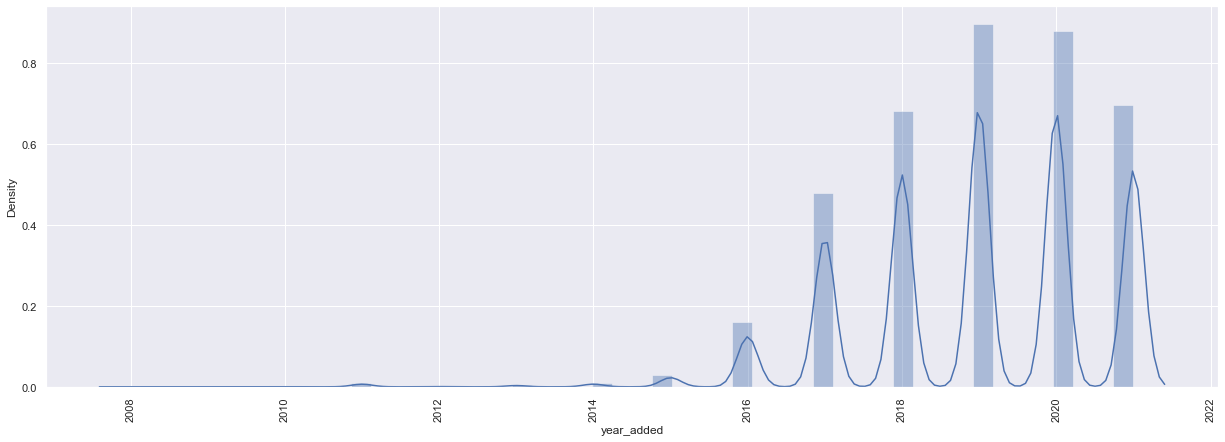

In [125]:
sns.set(rc = {'figure.figsize':(21, 7)})
fig = sns.distplot(a=df_final["year_added"], hist=True, kde=True)
fig.tick_params(axis='x', rotation=90)
plt.savefig('1_distplot_year_added.png')

#### Most of the movies were added on netflix between year `2016` to `2021` 

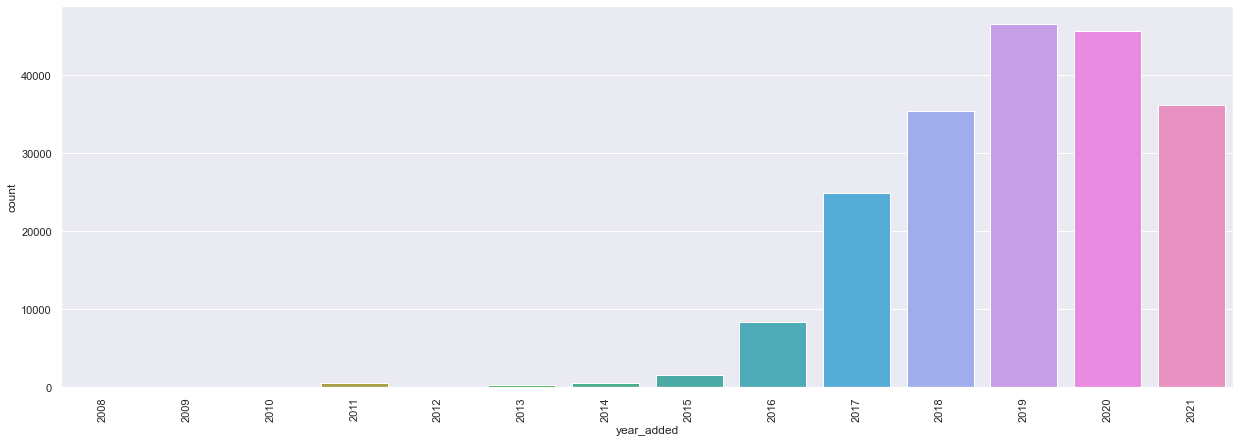

In [126]:
sns.set(rc = {'figure.figsize':(21, 7)})
fig = sns.countplot(data=df_final, x="year_added", orient="h")
fig.tick_params(axis='x', rotation=90)
plt.savefig('2_countplot_year_added.png')

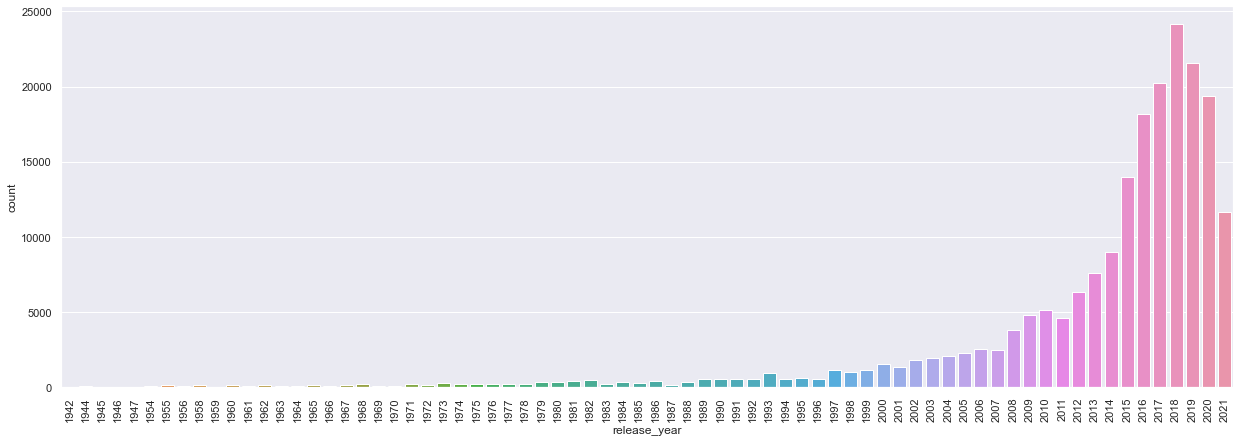

In [127]:
sns.set(rc = {'figure.figsize':(21, 7)})
fig = sns.countplot(data=df_final, x="release_year", orient="h")
fig.tick_params(axis='x', rotation=90)
plt.savefig('3_countplot_release_year.png')

#### Most of the movies that are on Netflix were released in last 2 decades i.e. between `2000` to `2020`

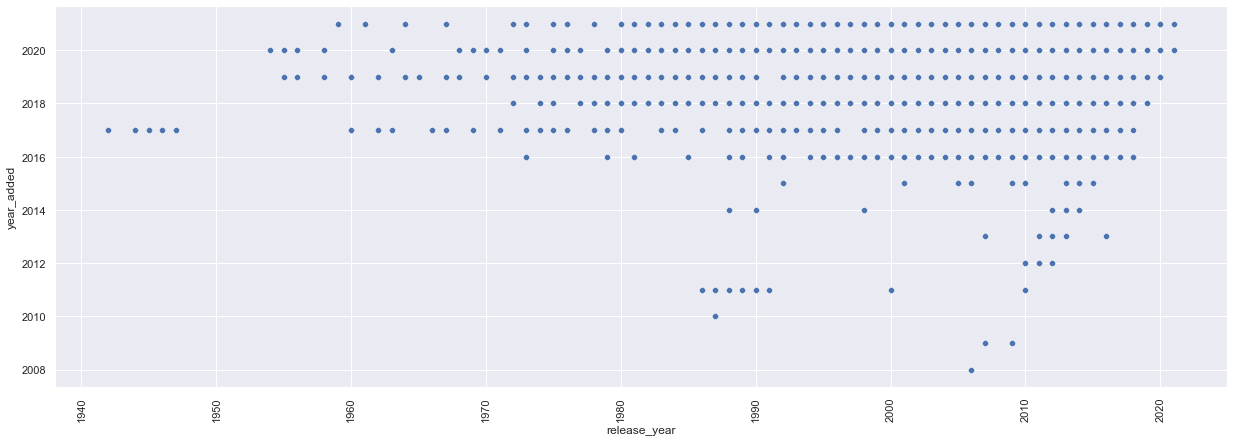

In [128]:
sns.set(rc = {'figure.figsize':(21, 7)})
fig = sns.scatterplot(data=df_final, x="release_year", y="year_added")
fig.tick_params(axis='x', rotation=90)
plt.savefig('4_scatterplot_release_year_year_added.png')

#### Netflix started to add more `Movies` to their platform after year `2016` onwards.

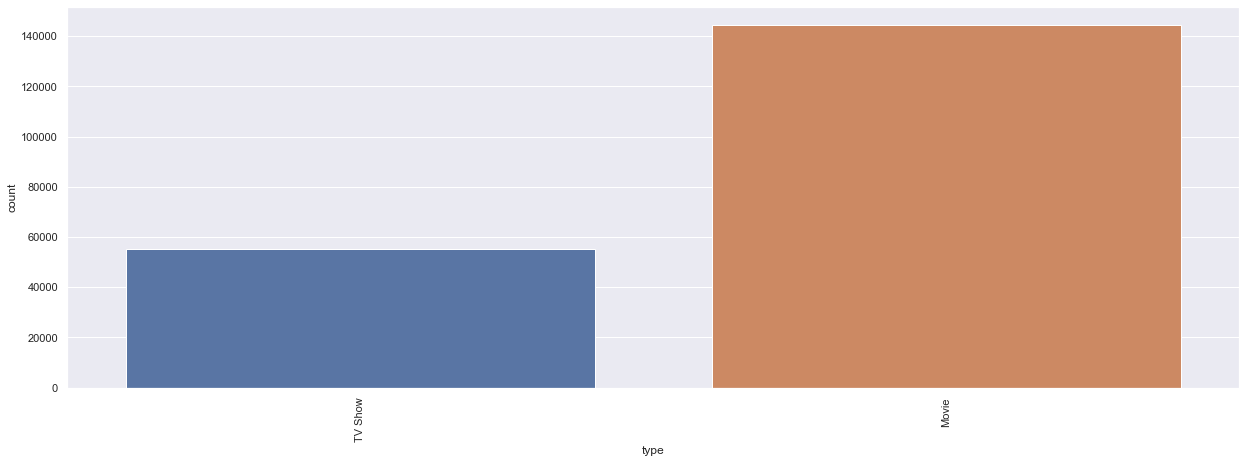

In [129]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = sns.countplot(data=df_final, x="type")
fig.tick_params(axis='x', rotation=90)
plt.savefig('5_countplot_type.png')

#### Currently there are more number of `Movies` on Netflix than `TV Shows`.
#### Netflix should increase the number of `TV Shows` on their platform to get more viewers and retain more customers.

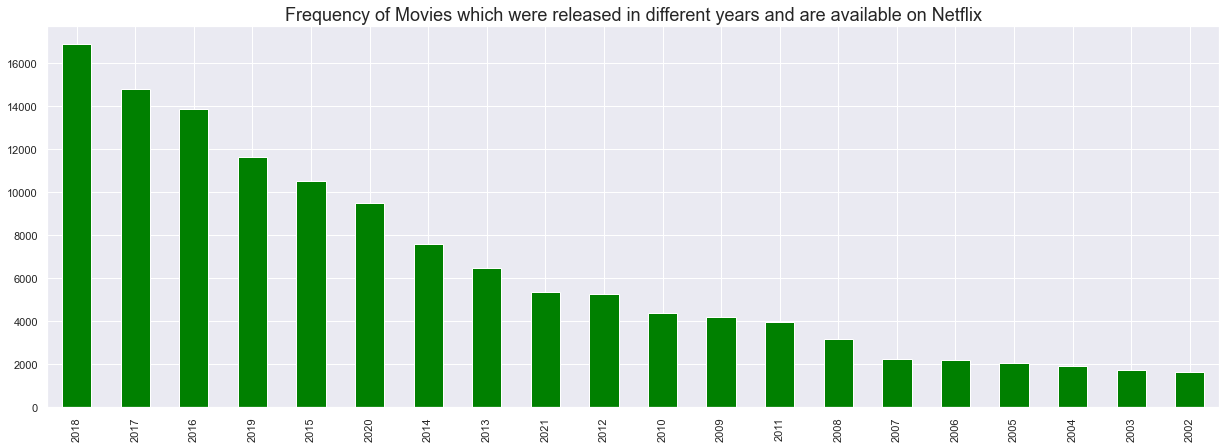

In [130]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = df_final[df_final["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="green")
plt.title("Frequency of Movies which were released in different years and are available on Netflix", size=18)
fig.tick_params(axis='x', rotation=90)
plt.savefig('6_barplot_type_movie_release_year.png')

#### Most number of `Movies` on Netflix were released on year `2018`
#### Netflix should increase the number of available `Movies` from last 3 years i.e. `2019` to `2021` as people like to watch more recently released movies.

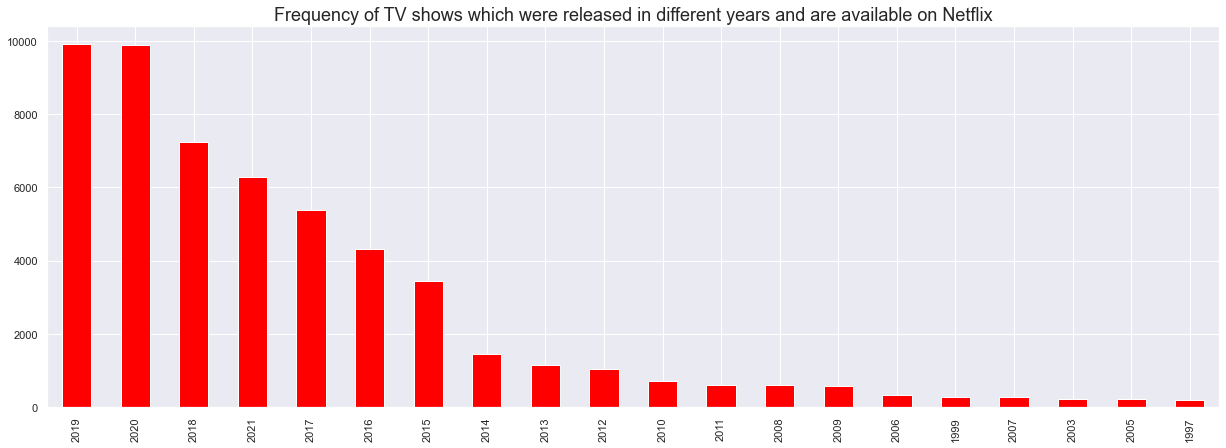

In [131]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = df_final[df_final["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="red")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix", size=18)
fig.tick_params(axis='x', rotation=90)
plt.savefig('7_barplot_type_tv_show_release_year.png')

#### Most number of `TV Shows` on Netflix were released on year `2019`
#### Netflix should increase the number of available `TV Shows` from last 3 years i.e. `2019` to `2021` as most of the people like to watch more recently released and fresh `TV Shows`

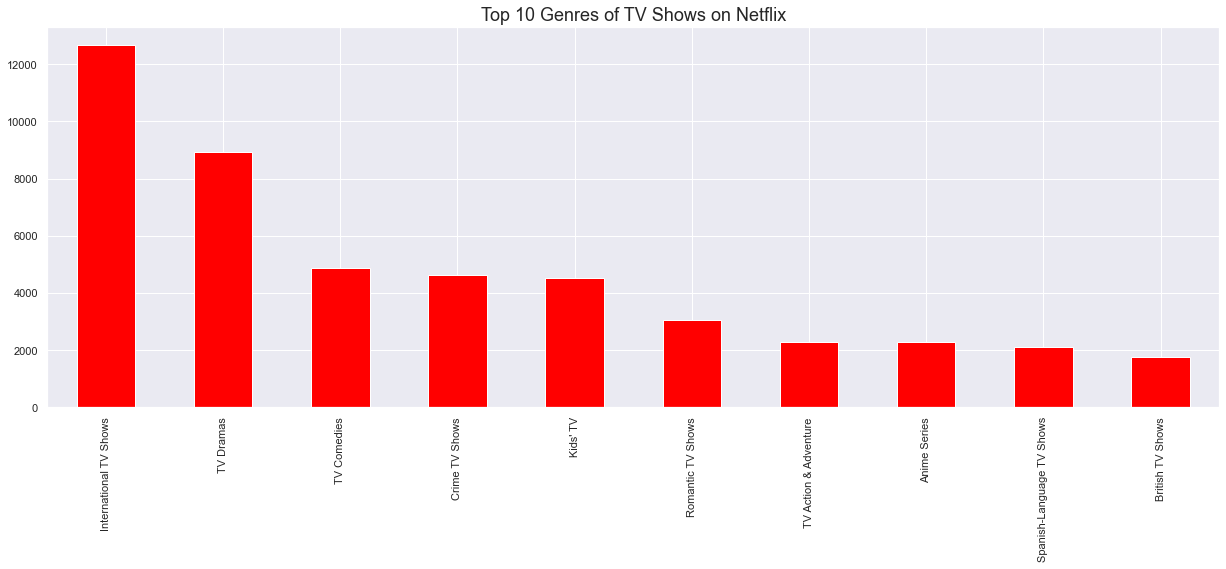

In [132]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = df_final[df_final["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="bar",color="red")
plt.title("Top 10 Genres of TV Shows on Netflix", size=18)
fig.tick_params(axis='x', rotation=90)
plt.savefig('8_barplot_type_tv_show_listed_in.png')

#### Most number of `TV Shows` on Netflix are in genre `International TV Shows`, `TV Drama`
#### Netflix should increase the number of available `TV Shows` in genre `TV Drama`, `TV Comdeies`, `Kids' TV` `TV Action & Adventure` and `Anime Series` as it will attract more young people and retain more viewers. 

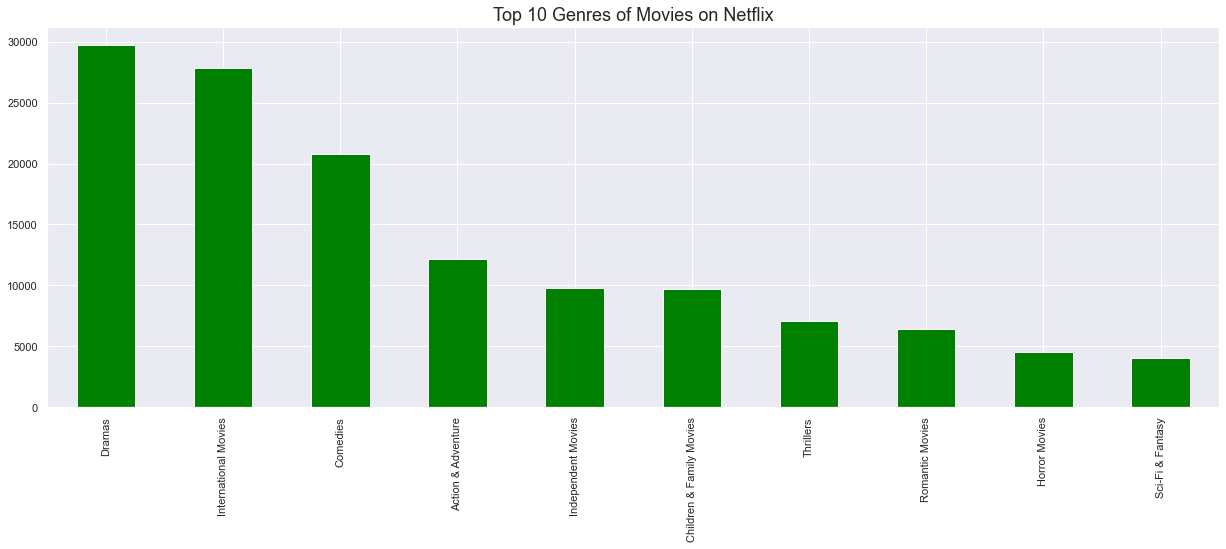

In [133]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = df_final[df_final["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="bar",color="green")
plt.title("Top 10 Genres of Movies on Netflix", size=18)
fig.tick_params(axis='x', rotation=90)
plt.savefig('9_barplot_type_movie_listed_in.png')

#### Most number of `Movies` on Netflix are in genre `Dramas` and `International Movies`
#### Netflix should increase the number of available `Movies` in genres  `Comedies`, `Action & Adventure`, `Children & Family Movies` and  as it will attract more young people.
#### Netflix should also look forward to increase available movies from `Sci-Fi & Fantasy` and `Horror Movies` genres as in past decade more `Animated` and movies which heavily used `CGI` used made more money and became hit.

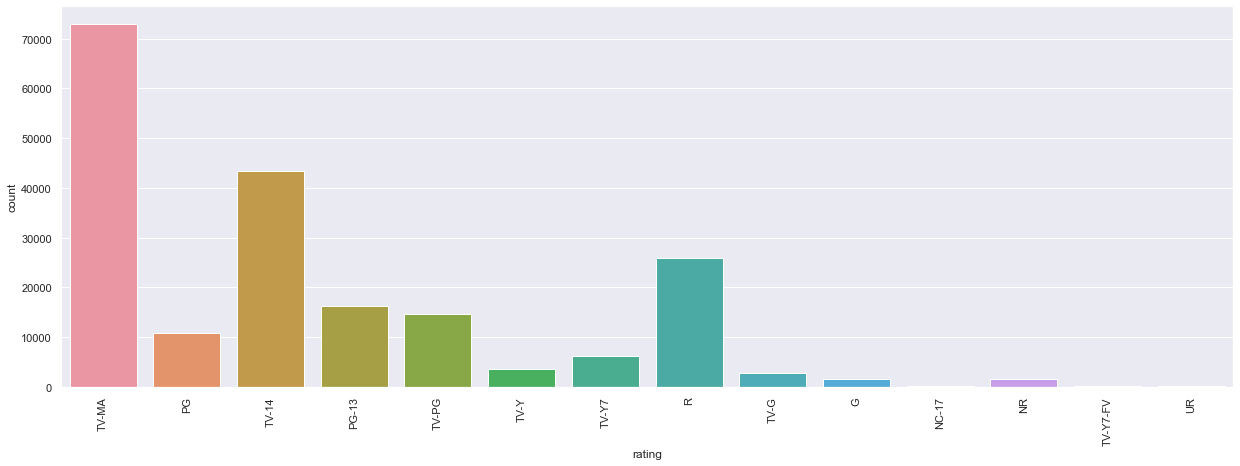

In [134]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = sns.countplot(data=df_final, x="rating")
fig.tick_params(axis='x', rotation=90)
plt.savefig('10_countplot_rating.png')

#### Netflix currently has more `TV Shows` and `Movies` with rating `TV-MA: Mature Audience Only`, `TV-14: Parents Strongly Cautioned`, `R: Restricted`
#### Most of the `Movies` and `TV Shows` from these genres can only be seen alone due to `Adult` scenes or `Mature` content.
#### Netflix should look forward to add shows which can be watched together or can be watched by either elder or younger people.
#### Netflix should slowly add more `Movies` and `TV Shows` with rating `TV-Y: All Children`, `TV-G: General Audience`, `G: General Audiences` 

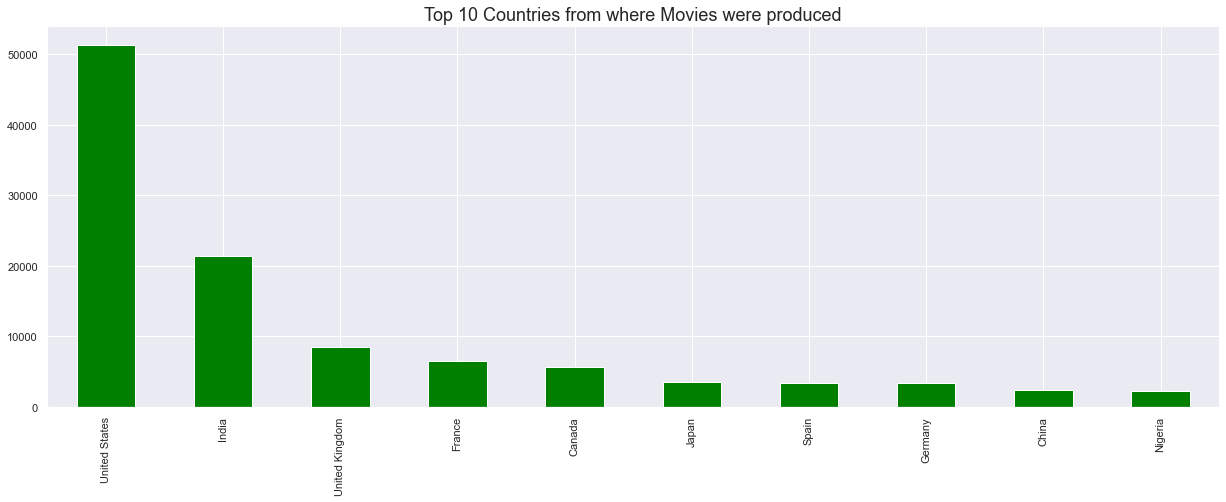

In [135]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = df_final[df_final["type"]=="Movie"]["country"].value_counts()[:10].plot(kind="bar",color="green")
plt.title("Top 10 Countries from where Movies were produced", size=18)
fig.tick_params(axis='x', rotation=90)
plt.savefig('11_barplot_type_movie_country.png')

#### Currently Netflix has most of its `Movies` which were released in countries like `United States` and also from `European` countries i.e. `United Kingdom`, `France`, `Germany`, `Spain`, etc.
#### Considering the growth opportunities and good market in` Asia`, Netflix should also increase adding `Movies` that were released in `India`, `China`, `Japan`, etc.

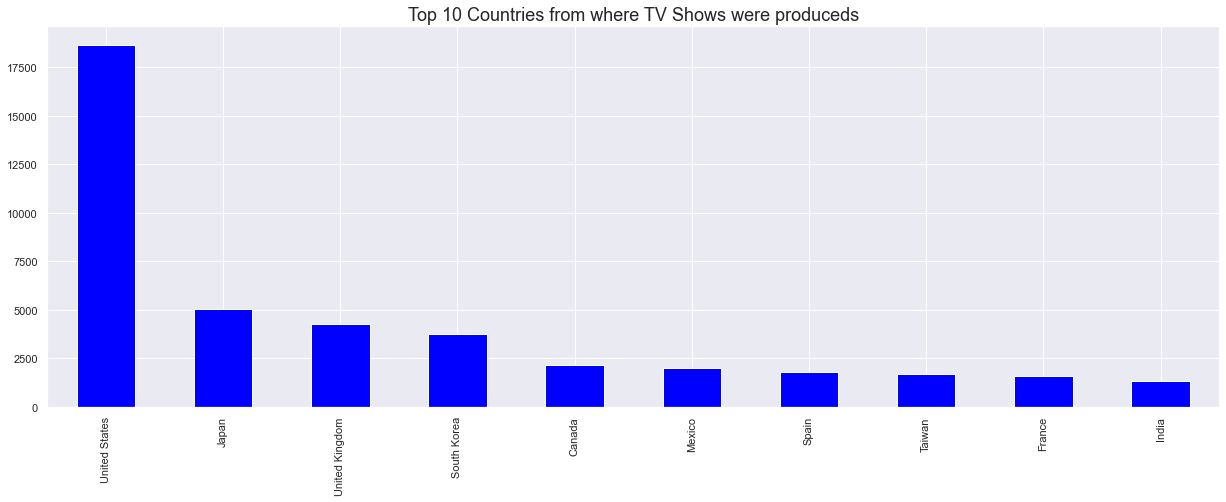

In [136]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = df_final[df_final["type"]=="TV Show"]["country"].value_counts()[:10].plot(kind="bar",color="blue")
plt.title("Top 10 Countries from where TV Shows were produceds", size=18)
fig.tick_params(axis='x', rotation=90)
plt.savefig('12_barplot_type_tv_shows_country.png')

#### Currently Netflix has most of its `TV Shows` which were released in countries like `United States`, `Japan` and also from `European` countries i.e. `United Kingdom`, `Germany`
#### Considering the growth opportunities and good market in `Asia`, Netflix should also increase adding `TV Shows` that were released in `India`, `South Korea`, etc.

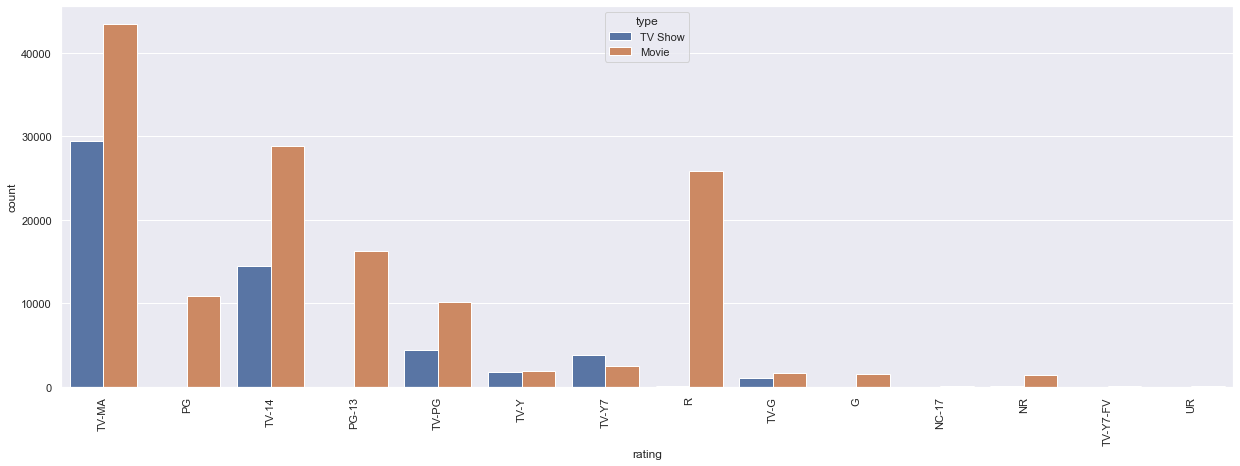

In [137]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = sns.countplot(data = df_final, x='rating', hue='type')
fig.tick_params(axis='x', rotation=90)
plt.savefig('13_countplot_rating_type.png')

#### Netflix has more number of `Movies` with different rating than number of `TV Shows`
#### Most of number of `Movies` on Netflix are rated `TV-MA: Mature Audience Only`, `TV-14: Parents Strongly Cautioned`, `PG-13: Parents Strongly Cautioned` and `R: Restricted` which can only be watched by people who are `18+` years old.
#### Netflix should look forward to increase the `TV Shows` and `Movies` with rating `TV-Y7: Directed to Older Children`, `TV-G: General Audience` and `G: General Audiences` so that they can also be watched together with family and friends.

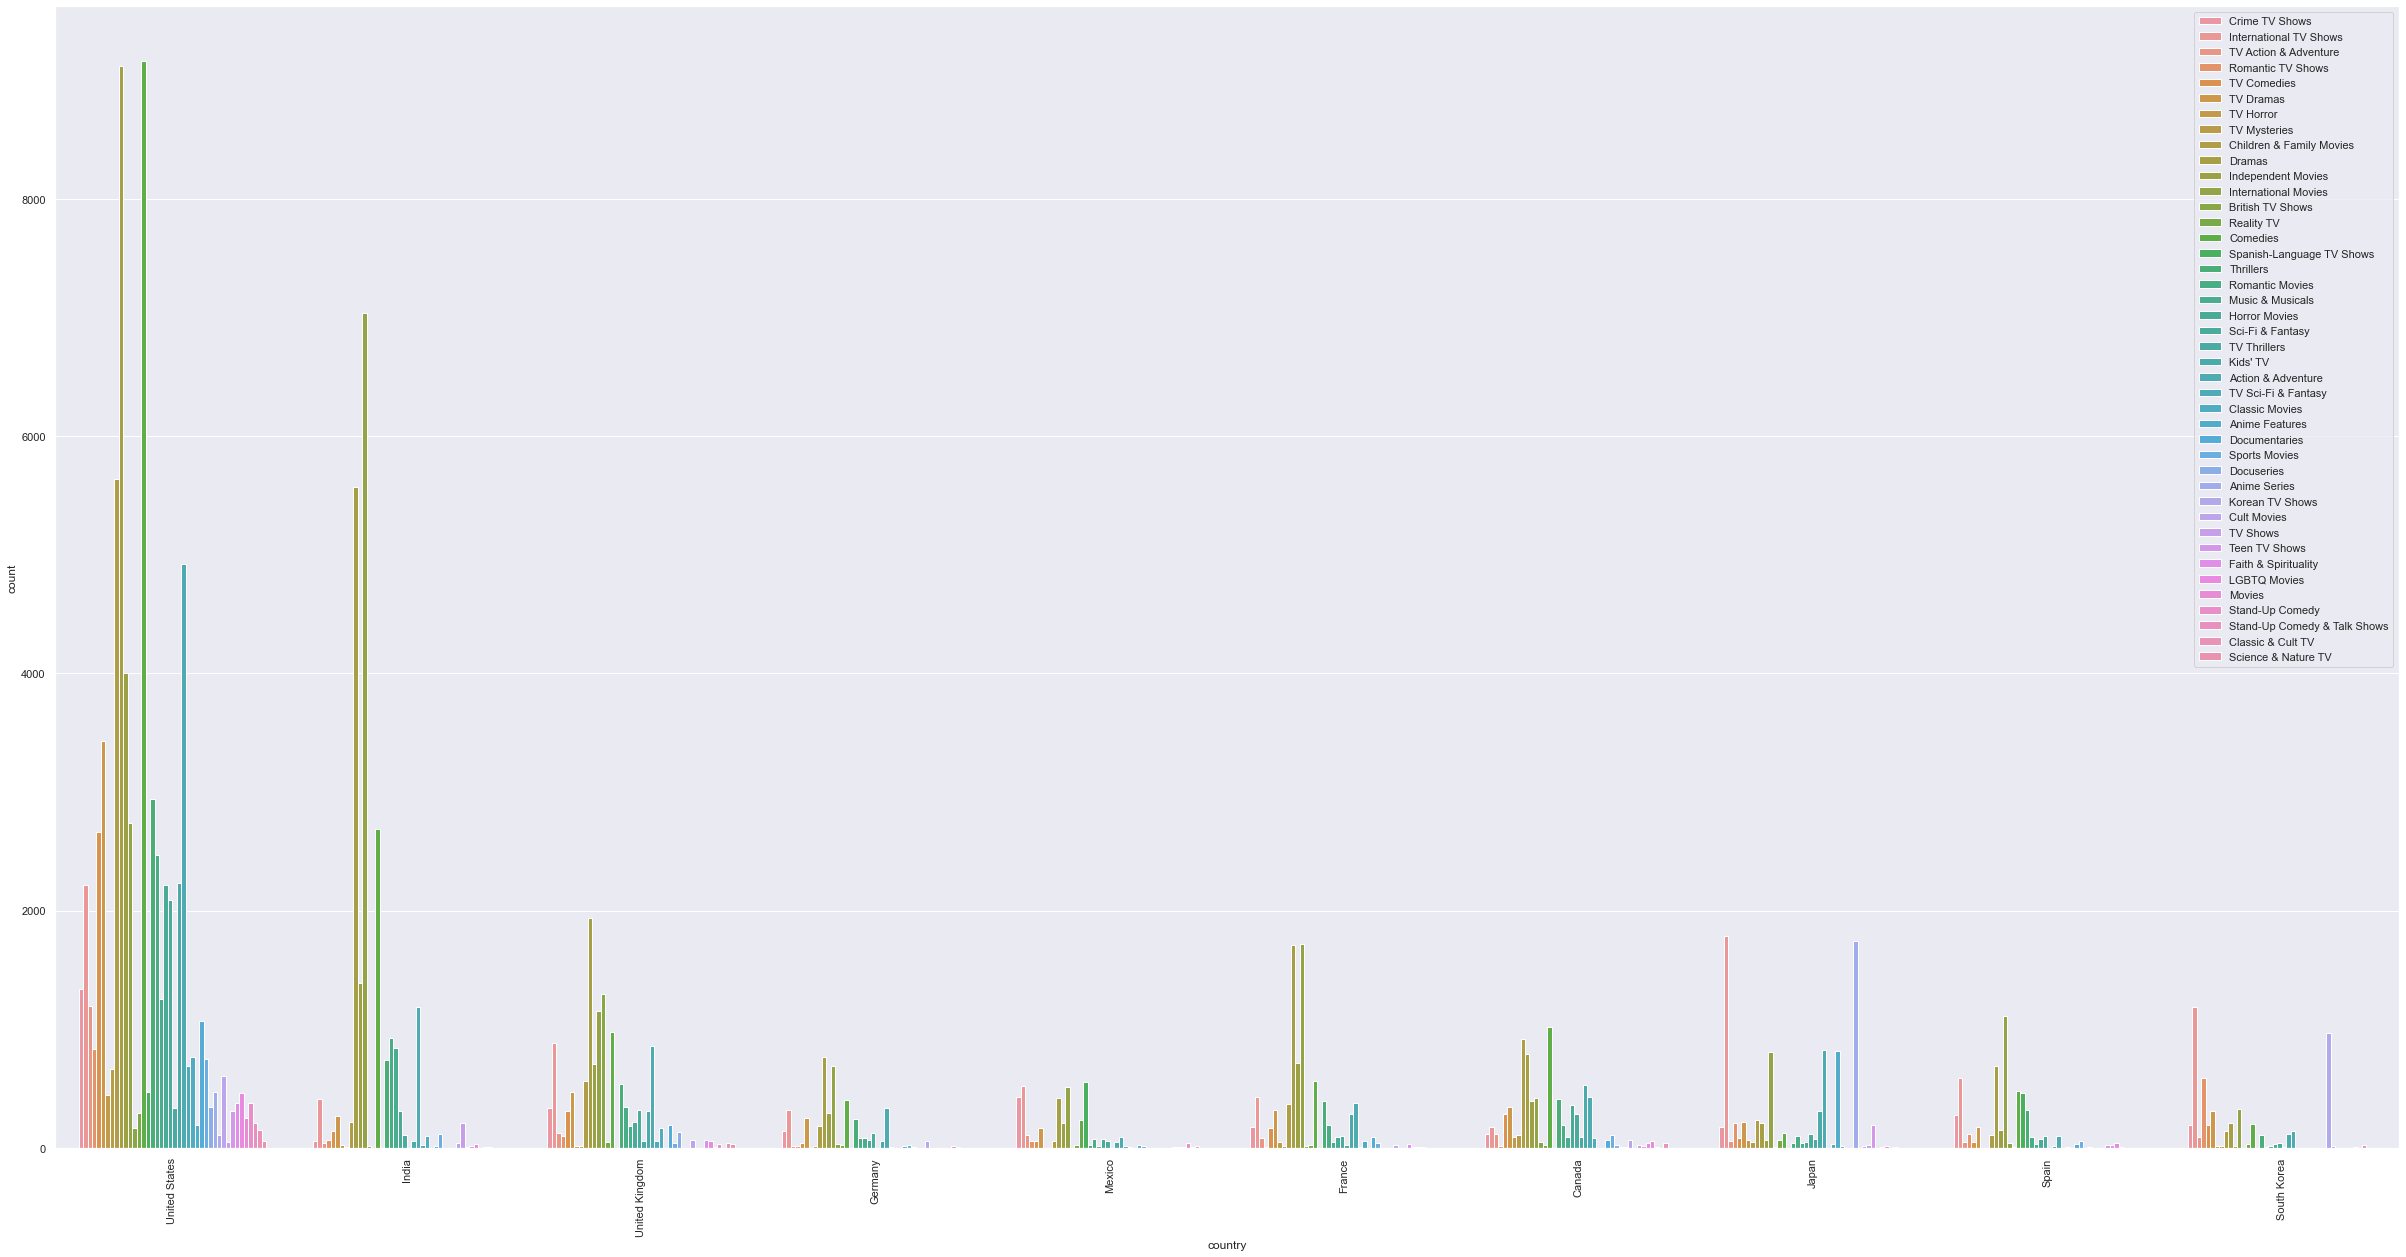

In [86]:
df_top_countries = df_final[df_final["country"].isin(["United States", "India", "United Kingdom", "Japan", "France", "Canada", "Spain", "South Korea", "Germany", "Mexico"])]

sns.set(rc = {'figure.figsize':(42,21)})
fig = sns.countplot(x="country", hue="listed_in",data=df_top_countries)
fig.legend(loc='upper right')
fig.tick_params(axis='x', rotation=90)
plt.savefig('14_countplot_genres_in_top_ten_Countries.png')

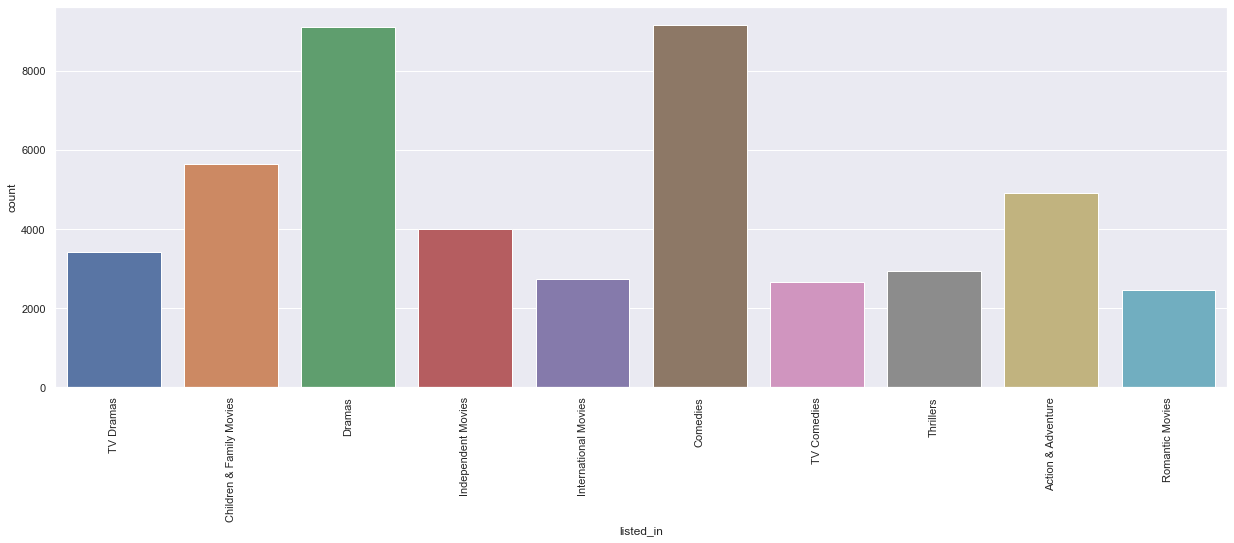

In [88]:
df_united_states = df_top_countries[df_top_countries["country"] == "United States"]
df_top_united_states_genres = df_united_states[df_united_states["listed_in"].isin(["Comedies", "Dramas", "Children & Family Movies", "Action & Adventure", "Independent Movies", "TV Dramas", "Thrillers", "International Movies", "TV Comedies", "Romantic Movies"])]


sns.set(rc = {'figure.figsize':(21,7)})
fig = sns.countplot(x="listed_in",data=df_top_united_states_genres)
fig.tick_params(axis='x', rotation=90)
plt.savefig('15_countplot_top_genres_in_united_states.png')

#### Netflix has more number of `Movies` and `TV Shows` in United States with genres `Dramas`, `Comedies`
#### Netflix should look forward to add more number of `Movies` and `TV Shows` in United States with genres `Dramas`, `Comedies` as well as `TV Dramas`, `Children & Family Movies`, `Action & Adventure`

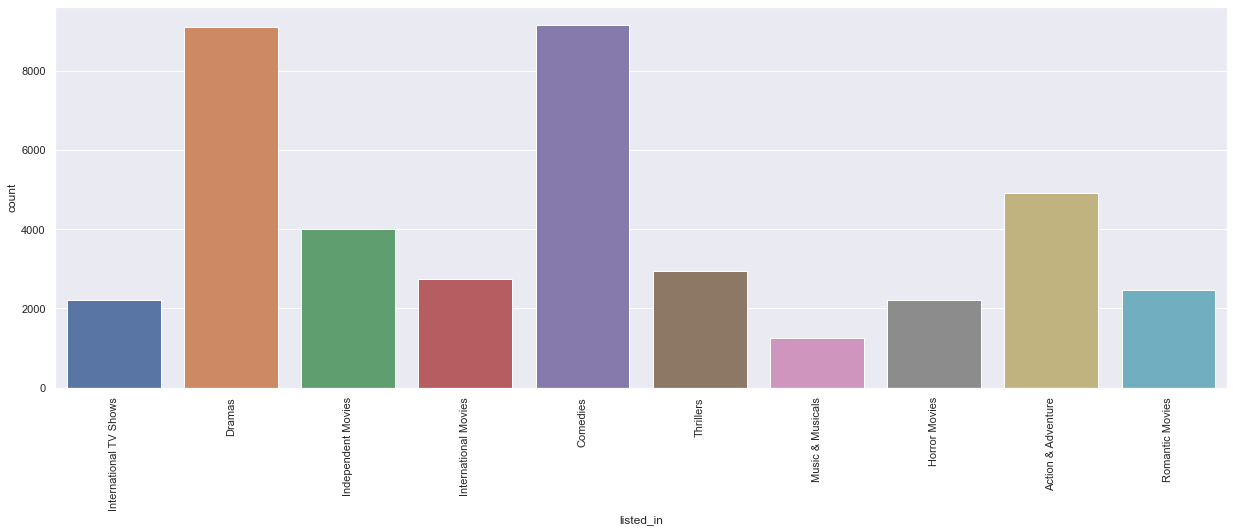

In [89]:
df_india = df_top_countries[df_top_countries["country"] == "India"]
df_top_india = df_united_states[df_united_states["listed_in"].isin(["International Movies", "Dramas", "Comedies", "Independent Movies", "Action & Adventure", "Romantic Movies", "Music & Musicals", "Thrillers", "International TV Shows", "Horror Movies"])]

sns.set(rc = {'figure.figsize':(21,7)})
fig = sns.countplot(x="listed_in",data=df_top_india)
fig.tick_params(axis='x', rotation=90)
plt.savefig('16_countplot_top_genres_in_india.png')

#### Netflix has more number of `Movies` and `TV Shows` in India with genres `Dramas`, `Comedies`
#### Netflix should look forward to add more number of `Movies` and `TV Shows` in India with genres `Dramas`, `Comedies` as well as `Independent Movies`, `Romantic Movies`, `Action & Adventure`

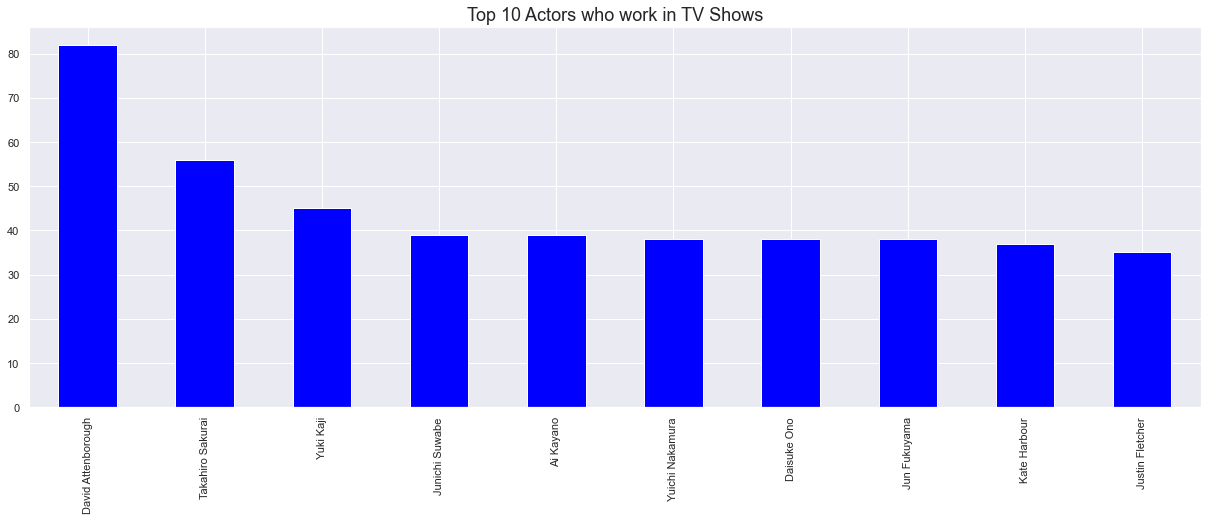

In [94]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = df_final[df_final["type"]=="TV Show"]["cast"].value_counts()[:10].plot(kind="bar",color="blue")
plt.title("Top 10 Actors who work in TV Shows", size=18)
fig.tick_params(axis='x', rotation=90)
plt.savefig('17_barplot_top_actor_tv_show.png')

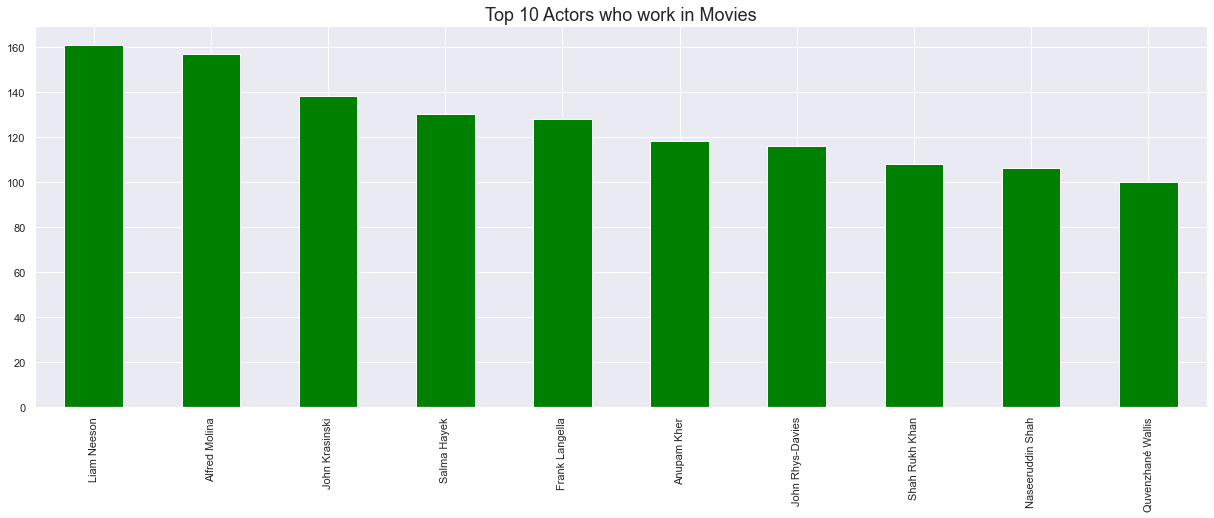

In [95]:
sns.set(rc = {'figure.figsize':(21,7)})
fig = df_final[df_final["type"]=="Movie"]["cast"].value_counts()[:10].plot(kind="bar",color="green")
plt.title("Top 10 Actors who work in Movies", size=18)
fig.tick_params(axis='x', rotation=90)
plt.savefig('18_barplot_top_actor_movie.png')